# **AP157 Module C Lab Assignment**

## Module C1: Networks

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.

_Credits_: The sample social network used is taken from https://nauczanki.wordpress.com/2014/11/10/social-network-analysis-basics-in-300-words-dalmooc-assignment-week-3/, which in turn is taken from an unspecified MOOC assignment.

### Student Information

_Full Name (Last Name, First Name)_: Clemente, Lance\
_Student No._: 2021-07811\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Lance Clemente**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/30
* Part 4 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For all parts of this assignment,  refer to the diagram of the sample social network in the Google Drive "Datasets" Folder (https://drive.google.com/file/d/1DkAK44GfocX0bmlSfK5Q6cbYXAUkixyj/view?usp=drive_link)

#### PART 1 - Network generation and characteristics *(30 points)*

1. Using the Python package networkx, define a network that represents the social network of friends in the diagram. *(15 points)*  

2. Calculate the ff. network characteristics: *(15 points; 5 points each)*
- Diameter
- Density
- Average Degree

3. Create the degree distribution plot and briefly discuss what it tells us about this social network. *(10 points)*

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import community
from sklearn.metrics import normalized_mutual_info_score
from networkx.algorithms import community
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community.quality import modularity
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
file_path = "/content/drive/My Drive/AP157/"

Mounted at /content/drive


In [ ]:
print(open('/content/drive/My Drive/AP157/friends.txt').read())

Lisa Allen
Allen Liz
Liz Emma Shane
Emma Mike Bob Jill Shane
Mike Bob Jill 
Bob John Leah Jill
John Shane Leah Jill 
Leah Shane Jill
Shane Jill
Jill


In [ ]:
G = nx.Graph()

adj_list = {
    'Lisa': ['Allen'],
    'Allen': ['Liz'],
    'Liz': ['Emma', 'Shane'],
    'Emma': ['Mike', 'Bob', 'Jill', 'Shane'],
    'Mike': ['Bob', 'Jill'],
    'Bob': ['John', 'Leah', 'Jill'],
    'John': ['Shane', 'Leah', 'Jill'],
    'Leah': ['Shane', 'Jill'],
    'Shane': ['Jill'],
    'Jill': []
}
for node, neighbors in adj_list.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

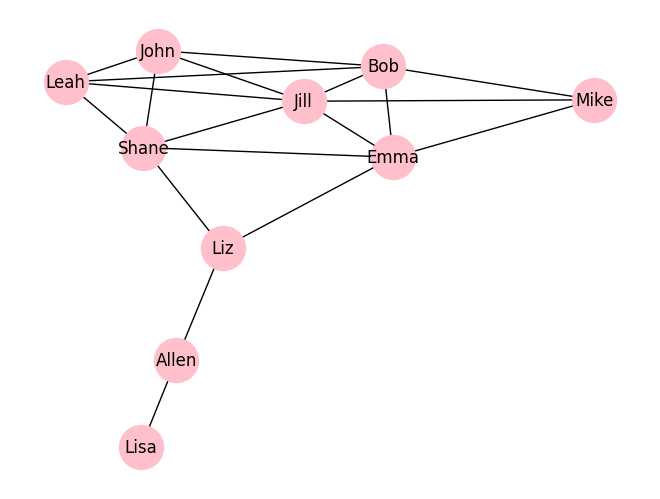

In [ ]:
SG = nx.read_adjlist('/content/drive/My Drive/AP157/friends.txt')
nx.draw(SG, node_size=1000, node_color='pink', with_labels=True)

In [ ]:
diameter = nx.diameter(SG)
print(f"Diameter: {diameter}")
density = nx.density(SG)
print(f"Density: {density}")
average_degree = sum(dict(SG.degree()).values()) / SG.number_of_nodes()
print(f"Average Degree: {average_degree:.2f}")

Diameter: 4
Density: 0.4222222222222222
Average Degree: 3.80


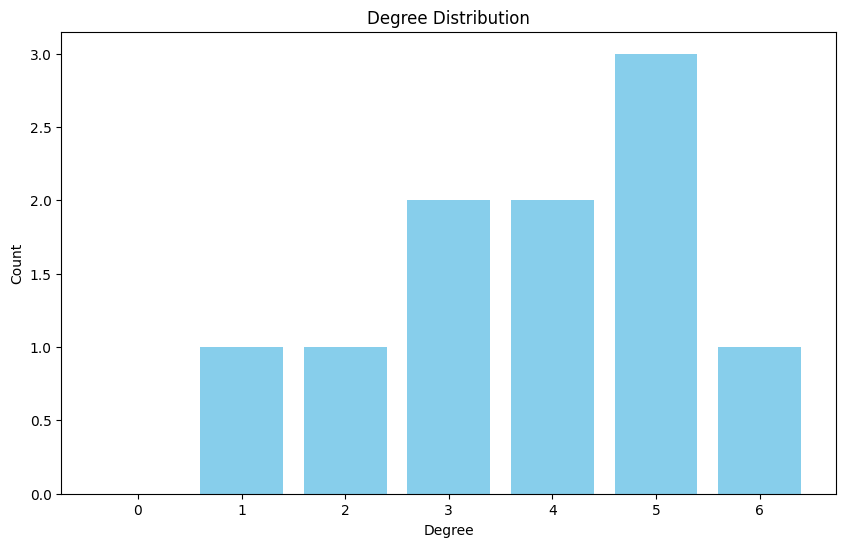

In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = nx.degree_histogram(G)
degrees = range(len(degree_count))

plt.figure(figsize=(10, 6))
plt.bar(degrees, degree_count, color='skyblue')
plt.title('Degree Distribution')
plt.ylabel('Count')
plt.xlabel('Degree')
plt.xticks(degrees)
plt.show()

The peaks in the degree distribution show nodes with more edges. The peak at degree 6 is hub of the network.

#### PART 2 - Centrality Measures *(30 points)*

Generate a table of centrality measures per node. Columns are:
- Name
- Degree Centrality
- Betweenness Centrality
- Closeness Centrality

Briefly discuss who are the most "central" people in the social network and why.

In [ ]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

centrality_data = {
    'Name': list(G.nodes),
    'Degree Centrality': [degree_centrality[node] for node in G.nodes],
    'Betweenness Centrality': [betweenness_centrality[node] for node in G.nodes],
    'Closeness Centrality': [closeness_centrality[node] for node in G.nodes]
}

centrality_df = pd.DataFrame(centrality_data)

print(centrality_df)

    Name  Degree Centrality  Betweenness Centrality  Closeness Centrality
0   Lisa           0.111111                0.000000              0.310345
1  Allen           0.222222                0.222222              0.428571
2    Liz           0.333333                0.388889              0.600000
3   Emma           0.555556                0.229167              0.642857
4  Shane           0.555556                0.226852              0.642857
5   Mike           0.333333                0.000000              0.500000
6    Bob           0.555556                0.046296              0.562500
7   Jill           0.666667                0.067130              0.600000
8   John           0.444444                0.006944              0.529412
9   Leah           0.444444                0.006944              0.529412


The most degree central person is Jill as she has the most direct connections,
The most betweenness central person is Liz as you need to pass through Liz to get to Allen and Lisa,
The most closeness centrality person is Shane and Emma.

#### PART 3 - Identify communities *(40 points)*

1. Identify communities in the social network using *(30 points)*:
- Louvain community detection algorithm
- Any other community detection algorithm of your choice

2. Calculate the modularity of the partitions from the two community detection algorithms. *(10 points)*

Briefly describe the algorithm you used and compare the results from the two algorithms.

In [ ]:
# Louvain community
louvain_partition = community.greedy_modularity_communities(G)

# Girvan-Newman community
communities_generator = girvan_newman(G)
girvan_partition = tuple(sorted(c) for c in next(communities_generator))

louvain_modularity = modularity(G, louvain_partition)
girvan_modularity = modularity(G, girvan_partition)

print("Louvain Community Detection:")
print("Number of communities:", len(louvain_partition))
print("Modularity:", louvain_modularity)
print("Partition:", louvain_partition)
print("\nGirvan-Newman Community Detection:")
print("Number of communities:", len(girvan_partition))
print("Modularity:", girvan_modularity)
print("Partition:", girvan_partition)

Louvain Community Detection:
Number of communities: 3
Modularity: 0.18698060941828254
Partition: [frozenset({'Mike', 'Bob', 'Emma', 'Jill'}), frozenset({'Liz', 'Allen', 'Lisa'}), frozenset({'Leah', 'John', 'Shane'})]

Girvan-Newman Community Detection:
Number of communities: 2
Modularity: 0.09279778393351806
Partition: (['Allen', 'Lisa'], ['Bob', 'Emma', 'Jill', 'John', 'Leah', 'Liz', 'Mike', 'Shane'])


The Louvain Community Detection seems to benefit for larger scale networks, while the Girvan-Newman Community Detection focuses on the betweenness centralities.